In [ ]:
#Import statements

import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Keyword_data - Keyword_data.csv to Keyword_data - Keyword_data.csv


In [ ]:
#Reading data as a dataframe and applying index

df = pd.read_csv('Keyword_data - Keyword_data.csv')
df = df.loc[~df['Keyword 1'].isnull()]
df.index = [i for i in range(len(df.index))]
df.head()

Title  \
0  Meta-Analyses of Financial Performance and Equ...   
1  Home Country Environments, Corporate Diversifi...   
2  Safeguarding Investments in Asymmetric Interor...   
3  Managerialist and Human Capital Explanations f...   
4  Bidding Wars Over R&D-Intensive Firms: Knowled...   

                       Keyword 1                         Keyword 2  \
0                         EQUITY          ORGANIZATIONAL sociology   
1    DIVERSIFICATION in industry                 BUSINESS planning   
2  INTERORGANIZATIONAL relations              INTERGROUP relations   
3         EXECUTIVE compensation                             WAGES   
4           KNOWLEDGE management  INFORMATION resources management   

                        Keyword 3               Keyword 4  \
0                     PERFORMANCE           META-analysis   
1           PERFORMANCE standards  EMPLOYEES -- Rating of   
2          BUSINESS communication             INVESTMENTS   
3                   HUMAN capital         LABOR economics   
4  MANAGEMENT information systems     BREAK-even analysis   

              Keyword 5                Keyword 6  \
0         PSYCHOMETRICS  ORGANIZATIONAL research   
1     CORPORATE culture       STRATEGIC planning   
2         SUPPLY chains     KNOWLEDGE management   
3  PERSONNEL management       MANAGEMENT science   
4           DATA mining       MANAGEMENT science   

                         Keyword 7                         Keyword 8  \
0            FINANCIAL performance                     AGENCY theory   
1     ORGANIZATIONAL effectiveness                MANAGEMENT science   
2     INTERORGANIZATIONAL networks              CORPORATE governance   
3  CONTINGENCY theory (Management)           COMPENSATION management   
4           RESEARCH & development  RESEARCH & development contracts   

                        Keyword 9               Keyword 10  \
0    ORGANIZATIONAL effectiveness  ORGANIZATIONAL behavior   
1             MANAGEMENT research       PRODUCT management   
2           GROUP decision making     INTELLECTUAL capital   
3  EXECUTIVE ability (Management)     CORPORATE governance   
4            CORPORATE governance          DECISION making   

                Keyword 11         Keyword 12  
0     CORPORATE governance                NaN  
1                      NaN                NaN  
2                      NaN                NaN  
3                      NaN                NaN  
4  ORGANIZATIONAL behavior  TRANSACTION costs

In [ ]:
#Printing Index

paperIndex = {df["Title"][i]:i for i in df.index}
#print(len(paperIndex))
print(len(df.index))

49


In [ ]:
#Step 2: Count the frequency of each keyword
keywords=[]
from collections import Counter
keyword_counts = Counter(keywords)

In [ ]:
# Step 3: Create a list of unique keywords
unique_keywords = list(keyword_counts.keys())

In [ ]:
# Step 4: Read the contents of the CSV file into a list of sets
import csv
with open('Keyword_data - Keyword_data.csv', 'r') as file:
    reader = csv.reader(file)
    rows = [{k.strip() for k in row[1].split(';')} for row in reader if row]

In [ ]:
#Replace all NaN values to empy strings

for Col in df.columns[1:]:
    df[Col] = df[Col].fillna('')
df.head()

Title  \
0  Meta-Analyses of Financial Performance and Equ...   
1  Home Country Environments, Corporate Diversifi...   
2  Safeguarding Investments in Asymmetric Interor...   
3  Managerialist and Human Capital Explanations f...   
4  Bidding Wars Over R&D-Intensive Firms: Knowled...   

                       Keyword 1                         Keyword 2  \
0                         EQUITY          ORGANIZATIONAL sociology   
1    DIVERSIFICATION in industry                 BUSINESS planning   
2  INTERORGANIZATIONAL relations              INTERGROUP relations   
3         EXECUTIVE compensation                             WAGES   
4           KNOWLEDGE management  INFORMATION resources management   

                        Keyword 3               Keyword 4  \
0                     PERFORMANCE           META-analysis   
1           PERFORMANCE standards  EMPLOYEES -- Rating of   
2          BUSINESS communication             INVESTMENTS   
3                   HUMAN capital         LABOR economics   
4  MANAGEMENT information systems     BREAK-even analysis   

              Keyword 5                Keyword 6  \
0         PSYCHOMETRICS  ORGANIZATIONAL research   
1     CORPORATE culture       STRATEGIC planning   
2         SUPPLY chains     KNOWLEDGE management   
3  PERSONNEL management       MANAGEMENT science   
4           DATA mining       MANAGEMENT science   

                         Keyword 7                         Keyword 8  \
0            FINANCIAL performance                     AGENCY theory   
1     ORGANIZATIONAL effectiveness                MANAGEMENT science   
2     INTERORGANIZATIONAL networks              CORPORATE governance   
3  CONTINGENCY theory (Management)           COMPENSATION management   
4           RESEARCH & development  RESEARCH & development contracts   

                        Keyword 9               Keyword 10  \
0    ORGANIZATIONAL effectiveness  ORGANIZATIONAL behavior   
1             MANAGEMENT research       PRODUCT management   
2           GROUP decision making     INTELLECTUAL capital   
3  EXECUTIVE ability (Management)     CORPORATE governance   
4            CORPORATE governance          DECISION making   

                Keyword 11         Keyword 12  
0     CORPORATE governance                     
1                                              
2                                              
3                                              
4  ORGANIZATIONAL behavior  TRANSACTION costs

In [ ]:
#Extracting all keyword pairs and pre-processing them

keywordslist = []
for col in df.columns[1:]:
    for keyword in df[col]:
        if keyword not in keywordslist:
            keywordslist.append(keyword)
keywordslist.sort()
keywordslist.remove('')
keywords = {keywordslist[i]:i for i in range(len(keywordslist))}
# print(keywords)
df_keywords = pd.DataFrame.from_dict(keywords, columns = ['Keyword Number'] , orient='index')

In [ ]:
df_keywords

Keyword Number
AGENCY theory                                           0
AGGRESSION (Psychology)                                 1
AMBIVALENCE                                             2
ANGER in the workplace                                  3
BEHAVIORAL research                                     4
...                                                   ...
WORK & family                                         243
WORK attitudes                                        244
WORK environment                                      245
WORK environment -- Psychological aspects             246
WORKFLOW                                              247

[248 rows x 1 columns]

In [ ]:
#Initialising a Weighted Adjacency Matrix

WAM = [[0 for j in range(len(keywords))] for i in range(len(keywords))]

In [ ]:
#Populating Adjacency Matrix

for i in df.index:
    for j in set(df.iloc[i, 1:]):
        if j != '':
            targets = set(df.iloc[i, 1:])
            targets.remove(j)
            if '' in targets: targets.remove('')
            for k in targets:
                WAM[keywords[j]][keywords[k]] += 1


In [ ]:
#Adjacency Matrix
import numpy as numpy
numpy.set_printoptions(threshold=np.inf)
x = numpy.array(WAM)
print(x)

[[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1
   0  0  1  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  1  0  1  0  1  0
   0  1  0  1  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0  0  0  0  0  0  0  4  0  0  2  0  0  1  3  2  0  0  1  0  0
   0  1  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  1  0  0  0  1  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  1
   0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
   0  0  0 

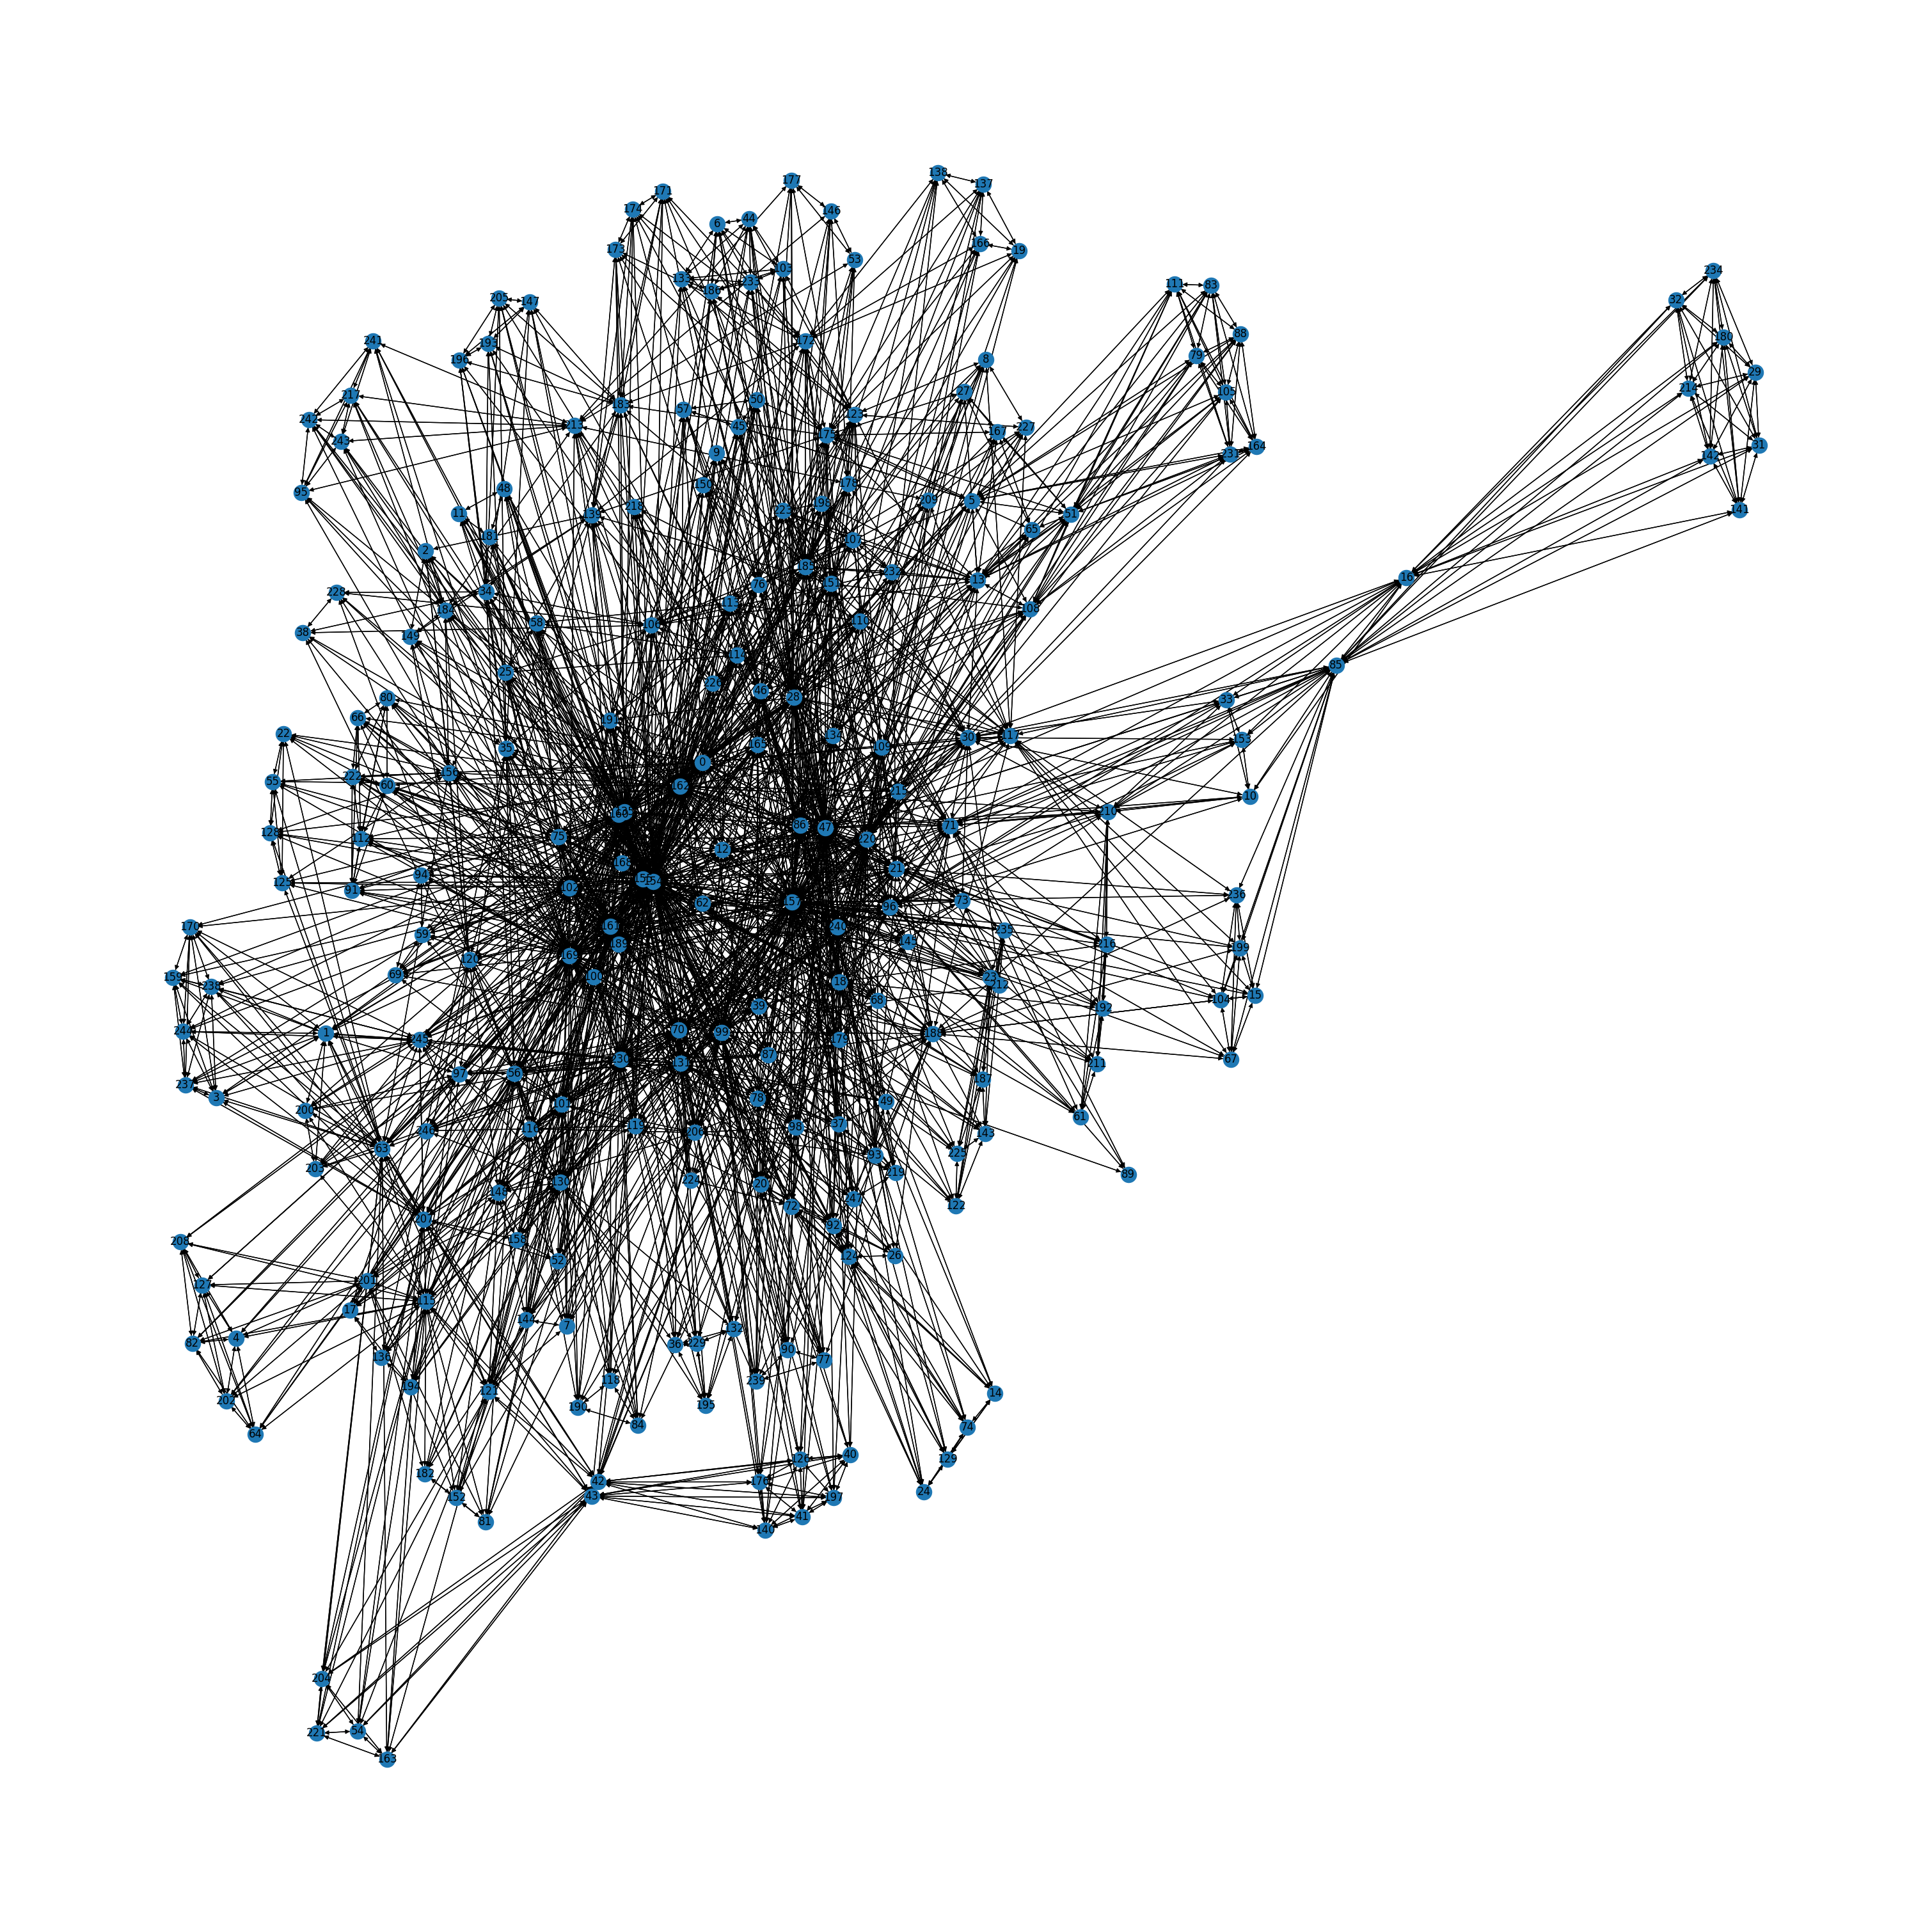

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt



# Created a directed graph (DiGraph) from the adjacency matrix
G = nx.DiGraph(np.array(WAM))
# Computing the layout of the graph using spring_layout
layout = nx.spring_layout(G)

# Drawing the graph using Matplotlib
plt.figure(figsize=(30, 30))
nx.draw(G, pos=layout, with_labels=True)
plt.show()


In [ ]:
#Computing the Node Degree

node_degree = [
    (keywordslist[i], sum(j > 0 for j in WAM[i]))
    for i in range(len(WAM))
    ]
df_nodedegree = pd.DataFrame(columns = ['Keywords','Degree'], data = sorted(node_degree, key=(lambda x:x[1]), reverse=True)[:10])

In [ ]:
df_nodedegree

Keywords  Degree
0       ORGANIZATIONAL behavior     166
1  ORGANIZATIONAL effectiveness     104
2            MANAGEMENT science     102
3          PERSONNEL management      93
4               DECISION making      90
5      ORGANIZATIONAL structure      74
6      ORGANIZATIONAL sociology      66
7            STRATEGIC planning      66
8         INDUSTRIAL management      64
9          CORPORATE governance      62

In [ ]:
#Computing the Node Strength

node_strength = [
    (keywordslist[i], sum(WAM[i]))
    for i in range(len(WAM))
    ]
df_nodestrength = pd.DataFrame(columns = ['Keywords', 'Strength'], data=sorted(node_strength, key=(lambda x:x[1]), reverse=True)[:10])

In [ ]:
df_nodestrength

Keywords  Strength
0       ORGANIZATIONAL behavior       265
1  ORGANIZATIONAL effectiveness       144
2            MANAGEMENT science       136
3          PERSONNEL management       126
4               DECISION making       112
5      ORGANIZATIONAL structure       107
6      ORGANIZATIONAL sociology        96
7          CORPORATE governance        85
8         INDUSTRIAL management        84
9            STRATEGIC planning        80

In [ ]:
#Top 10 Keywords and degrees

df1 = pd.DataFrame(node_degree,columns=['keywords','degrees'])
df2= df1.sort_values('degrees', ascending=False).head(n=10)

In [ ]:
df2

keywords  degrees
154       ORGANIZATIONAL behavior      166
157  ORGANIZATIONAL effectiveness      104
135            MANAGEMENT science      102
169          PERSONNEL management       93
47                DECISION making       90
162      ORGANIZATIONAL structure       74
161      ORGANIZATIONAL sociology       66
220            STRATEGIC planning       66
99          INDUSTRIAL management       64
28           CORPORATE governance       62

In [ ]:
#Top 10 Keywords and Strength

df3 = pd.DataFrame(node_strength,columns=['keywords','strength'])
df4= df3.sort_values('strength', ascending=False).head(n=10)

In [ ]:
df4

keywords  strength
154       ORGANIZATIONAL behavior       265
157  ORGANIZATIONAL effectiveness       144
135            MANAGEMENT science       136
169          PERSONNEL management       126
47                DECISION making       112
162      ORGANIZATIONAL structure       107
161      ORGANIZATIONAL sociology        96
28           CORPORATE governance        85
99          INDUSTRIAL management        84
220            STRATEGIC planning        80

In [ ]:
#Computing the node pairs by weight
weights = {}
for i in range(len(WAM)):
    for j in range(len(WAM[i])):
        if f'{keywordslist[j]}-{keywordslist[i]}' in weights: continue
        weights[f'{keywordslist[i]}-{keywordslist[j]}'] = WAM[i][j]

weights_list = sorted(weights.items(), key=(lambda x:x[1]), reverse=True)[:10]
keywords = [x[0] for x in weights_list]
weights = [x[1] for x in weights_list]

weights_df = pd.DataFrame({
    'Keyword Pair': keywords,
    'Weight': weights
})


In [ ]:
weights_df

Keyword Pair  Weight
0  ORGANIZATIONAL behavior-ORGANIZATIONAL effecti...      11
1   ORGANIZATIONAL behavior-ORGANIZATIONAL structure       9
2       ORGANIZATIONAL behavior-PERSONNEL management       8
3         MANAGEMENT science-ORGANIZATIONAL behavior       7
4       CORPORATE governance-ORGANIZATIONAL behavior       6
5            DECISION making-ORGANIZATIONAL behavior       6
6   ORGANIZATIONAL behavior-ORGANIZATIONAL sociology       6
7  ORGANIZATIONAL effectiveness-ORGANIZATIONAL st...       6
8      INDUSTRIAL management-ORGANIZATIONAL behavior       5
9       INDUSTRIAL relations-ORGANIZATIONAL behavior       5

In [ ]:
#Computing the Average Strength
df5 = pd.merge(df1, df3, on ='keywords')
df5['Average Strength'] = df5['strength']/df5['degrees']
df5

keywords  degrees  strength  \
0                                AGENCY theory       38        48   
1                      AGGRESSION (Psychology)       18        20   
2                                  AMBIVALENCE        9         9   
3                       ANGER in the workplace       11        11   
4                          BEHAVIORAL research        9         9   
..                                         ...      ...       ...   
243                              WORK & family        9         9   
244                             WORK attitudes       11        11   
245                           WORK environment       26        31   
246  WORK environment -- Psychological aspects       10        10   
247                                   WORKFLOW       10        10   

     Average Strength  
0            1.263158  
1            1.111111  
2            1.000000  
3            1.000000  
4            1.000000  
..                ...  
243          1.000000  
244          1.000000  
245          1.192308  
246          1.000000  
247          1.000000  

[248 rows x 4 columns]

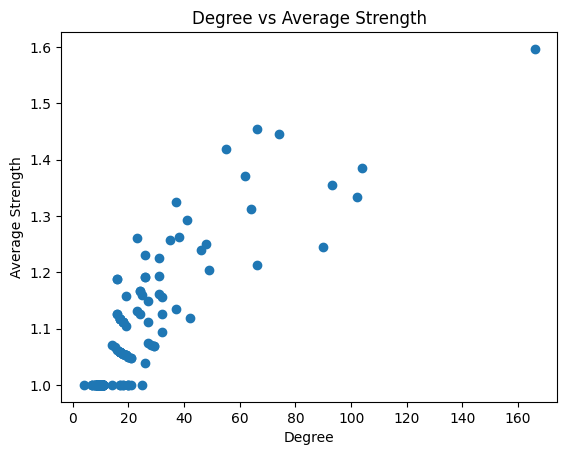

In [ ]:
#Scatter Plot - Degree vs Average Strength

plt.title('Degree vs Average Strength')
plt.xlabel('Degree')
plt.ylabel('Average Strength')
plt.scatter(x= df5['degrees'], y = df5['Average Strength'])
plt.show()

<Axes: title={'center': 'Degree vs Average Strength'}, xlabel='degrees', ylabel='Average Strength'>

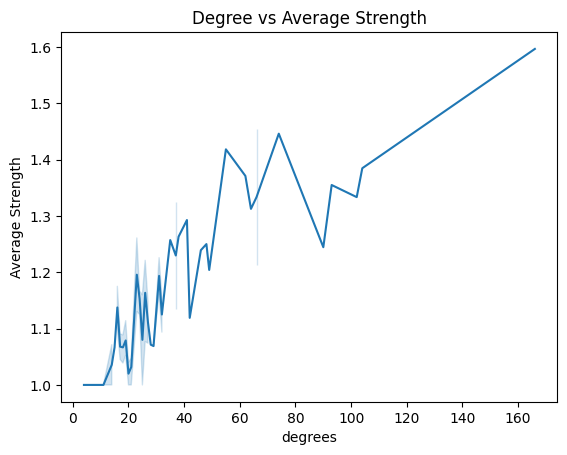

In [ ]:
#Line Plot - Degree vs Average Strength

import seaborn as sns
plt.title('Degree vs Average Strength')
sns.lineplot(x = df5['degrees'], y = df5['Average Strength'])